In [1]:
import pandas as pd
import os
import numpy as np
import ast


## The purpose of this analysis is to break down ICAO airplane accident data by various categories (primarily by manufacturer) to gain general insights about plane manufacturer safety statistics and better understand the legitimacy of the early 2024 media craze surrounding Boeing that was prompted by the DoorPlug-Gate Scandal.

First, we will combine the yearly accident data into a single comprehensive files: 'accident_data.csv' 

In [3]:
accident_dfs = []

for filename in os.listdir('Accidents'):
    if filename.endswith('.csv') and filename.startswith('Accidents'):
    
        df = pd.read_csv('Accidents' + '/' + filename)
        
        # Append the DataFrame to the list
        accident_dfs.append(df)
        

# Combine all DataFrames into a single DataFrame
combined_accident_df = pd.concat(accident_dfs, ignore_index=True)

# save to new csv
combined_accident_df.to_csv('accident_data.csv', index=False)


Now we will read in the aircraft database file from Gigasheet. This file contains ~500,000 rows of aircraft information, including registration number, manufacturer name, model name, etc. 

In [4]:
aircraft_database = pd.read_csv('aircraft_database.csv')

aircraft_database.drop(['serialnumber', 'icao24', 'linenumber', 'manufacturericao', 'icaoaircrafttype',
       'operator', 'operatorcallsign', 'operatoricao', 'operatoriata', 'owner',
       'testreg', 'registered', 'reguntil', 'status', 'built',
       'firstflightdate', 'seatconfiguration', 'engines', 'modes', 'adsb',
       'acars', 'notes', 'categoryDescription', 'typecode'], axis = 1, inplace = True)

aircraft_database

,registration,manufacturername,model
0,N757F,Raytheon Aircraft Company,A36
1,N42MH,Piper,PA-31-350
2,N5926K,NaN,NaN
3,F-GGJH,Robin,DR.400 160 Chevalier
4,LY-KNA,Impulse Aircraft,Impulse 100
...,...,...,...
519994,N15RX,Cirrus Design Corp,SR22
519995,OY-VXG,Rolladen-schneider,LS1 f
519996,B-LRG,Airbus,A350 941
519997,N9869D,NaN,NaN


Inserting an ID number, this will make future SQL queries easier.

In [5]:
aircraft_database.reset_index(inplace = True)
aircraft_database.rename(columns={'index': 'id'}, inplace=True)
aircraft_database

,id,registration,manufacturername,model
0,0,N757F,Raytheon Aircraft Company,A36
1,1,N42MH,Piper,PA-31-350
2,2,N5926K,NaN,NaN
3,3,F-GGJH,Robin,DR.400 160 Chevalier
4,4,LY-KNA,Impulse Aircraft,Impulse 100
...,...,...,...,...
519994,519994,N15RX,Cirrus Design Corp,SR22
519995,519995,OY-VXG,Rolladen-schneider,LS1 f
519996,519996,B-LRG,Airbus,A350 941
519997,519997,N9869D,NaN,NaN


Creating updated aircraft database csv file.

In [6]:
aircraft_database.to_csv('aircraft_database_2.csv', encoding='utf-8', index=False)

Inserting an ID number to the accident dataframe, this will make future SQL queries easier.

In [7]:
combined_accident_df.reset_index(inplace = True)
combined_accident_df.rename(columns={'index': 'id'}, inplace=True)
combined_accident_df

,id,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,...,InjuryLevel,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,OccCats,Risk,Year
0,0,"""2008-01-02T00:00:00.000Z""",PHL,Masbate Airport (MBT),NAMC YS11 A,RP-C3592,Philippines Asian Spirit,PHL,PHL,Landing,...,None,YS11,False,True,2,Turboprop,NaN,"[""RE""]",RS,2008
1,1,"""2008-01-02T00:00:00.000Z""",IRN,Tehran-Mehrabad Airport (THR),FOKKER F27 100,EP-IDB,"Iran, Islamic Republic Of Iran National Airlin...",IRN,IRN,Take-off,...,None,F27,False,True,2,Turboprop,NaN,"[""F-POST"",""ICE""]",OTH,2008
2,2,"""2008-01-03T00:00:00.000Z""",USA,Oklahoma City,PILATUS PC12,N398J,NaN,NaN,USA,Standing,...,Fatal,PC12,False,True,1,Turboprop,NaN,"[""RAMP""]",RS,2008
3,3,"""2008-01-04T00:00:00.000Z""",VEN,A 20 NM del VOR del Gran Roque,LET L410 UVP,YV2081,Venezuela,VEN,VEN,En route,...,Fatal,L410,False,True,2,Turboprop,NaN,"[""SCF-PP""]",SCF,2008
4,4,"""2008-01-05T00:00:00.000Z""",USA,Kodiak,PIPER PA31P 350,N509FN,NaN,NaN,USA,Take-off,...,Fatal,PA47,False,True,1,Jet,NaN,"[""LOC-I"",""SCF-NP""]",LOC-I,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,5948,"""2022-05-06T00:00:00.000Z""",ITA,Napoli-Capodichino Airport (NAP),Boeing 737-82R (WL),YR-BMM,Blue Air,ROU,ROU,Landing,...,NaN,B38M,False,True,2,Jet,NaN,[],RS,2022
5949,5949,"""2022-05-06T00:00:00.000Z""",CHL,Santiago-Arturo Merino Benitez Airport (SCL),Beechcraft 200 Super King Air,CC-CDY,NaN,NaN,CHL,Landing,...,NaN,BE20,False,True,2,Turboprop,NaN,[],RS,2022
5950,5950,"""2022-05-11T00:00:00.000Z""",BRA,"Boituva, SP",Cessna 208 Caravan I,PT-OQR,"Skydive4Fun, opf. LBK Servi�o A�reo Especializado",NaN,BRA,Initial Climb,...,Fatal,C208,False,True,1,Turboprop,NaN,[],UNK,2022
5951,5951,"""2022-05-11T00:00:00.000Z""",CMR,near Nanga Eboko,Viking DHC-6 Twin Otter 400,TJ-TIM,Caverton Helicopters,NaN,CMR,En route,...,Fatal,DHC6,False,True,2,Turboprop,NaN,[],LOC-I,2022


Creating an updated accident csv file that contains id column.

In [8]:
combined_accident_df.to_csv('combined_accident_2.csv', encoding='utf-8', index=False)

Reading in SQL joined file. In pgAdmin, I combined the combined_accident_2.csv with aircraft_database_2.csv on the registration number to get the manufacturer name for as many models possible. During the exportation process, I had to drop 'Risk' and 'OccCats' due to errors caused by commas in the strings (we will add these back in later).

In [9]:
acc_manufacturer_df = pd.read_csv('accident_data_manufacturer.csv')
acc_manufacturer_df


,id,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,...,Scheduled,InjuryLevel,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,Year,manufacturer
0,0,"'2008-01-02T00:00:00.000Z'""""",PHL,Masbate Airport (MBT),NAMC YS11 A,RP-C3592,Philippines Asian Spirit,PHL,PHL,Landing,...,t,None,YS11,f,t,2,Turboprop,NaN,2008,NaN
1,1,"'2008-01-02T00:00:00.000Z'""""",IRN,Tehran-Mehrabad Airport (THR),FOKKER F27 100,EP-IDB,"Iran, Islamic Republic Of Iran National Airlin...",IRN,IRN,Take-off,...,t,None,F27,f,t,2,Turboprop,NaN,2008,NaN
2,2,"'2008-01-03T00:00:00.000Z'""""",USA,Oklahoma City,PILATUS PC12,N398J,NaN,NaN,USA,Standing,...,NaN,Fatal,PC12,f,t,1,Turboprop,NaN,2008,Pilatus
3,3,"'2008-01-04T00:00:00.000Z'""""",VEN,A 20 NM del VOR del Gran Roque,LET L410 UVP,YV2081,Venezuela,VEN,VEN,En route,...,t,Fatal,L410,f,t,2,Turboprop,NaN,2008,NaN
4,4,"'2008-01-05T00:00:00.000Z'""""",USA,Kodiak,PIPER PA31P 350,N509FN,NaN,NaN,USA,Take-off,...,NaN,Fatal,PA47,f,t,1,Jet,NaN,2008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,5948,"'2022-05-06T00:00:00.000Z'""""",ITA,Napoli-Capodichino Airport (NAP),Boeing 737-82R (WL),YR-BMM,Blue Air,ROU,ROU,Landing,...,t,NaN,B38M,f,t,2,Jet,NaN,2022,Boeing
5959,5949,"'2022-05-06T00:00:00.000Z'""""",CHL,Santiago-Arturo Merino Benitez Airport (SCL),Beechcraft 200 Super King Air,CC-CDY,NaN,NaN,CHL,Landing,...,f,NaN,BE20,f,t,2,Turboprop,NaN,2022,NaN
5960,5950,"'2022-05-11T00:00:00.000Z'""""",BRA,"Boituva, SP",Cessna 208 Caravan I,PT-OQR,"Skydive4Fun, opf. LBK Servi�o A�reo Especializado",NaN,BRA,Initial Climb,...,f,Fatal,C208,f,t,1,Turboprop,NaN,2022,NaN
5961,5951,"'2022-05-11T00:00:00.000Z'""""",CMR,near Nanga Eboko,Viking DHC-6 Twin Otter 400,TJ-TIM,Caverton Helicopters,NaN,CMR,En route,...,f,Fatal,DHC6,f,t,2,Turboprop,NaN,2022,NaN


SQL join created duplicate ID rows in 'accident_data_manufacturer.csv.' After taking time to view the repeat 'id' values, I saw only one row for each 'id' had a valid manufacturer name in the 'manufacturer' column so I dropped the rows with null manufacturer values.

In [12]:
rep_values = acc_manufacturer_df['id'].value_counts()
rep_values_geq2 = rep_values[rep_values >= 2]
rep_values_geq2

indices_to_drop = []
for id_, count in rep_values_geq2.items():
    df_sub = acc_manufacturer_df[acc_manufacturer_df['id'] == id_]
    indices_to_drop.append(df_sub[df_sub['manufacturer'].isnull()].index[0])
#     print(df_sub[df_sub['manufacturer'].isnull()].index[0])

acc_manufacturer_df.drop(indices_to_drop, inplace=True) 
# len(acc_manufacturer_df)

acc_manufacturer_df.reset_index(inplace = True, drop = True)
acc_manufacturer_df

,id,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,...,Scheduled,InjuryLevel,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,Year,manufacturer
0,0,"'2008-01-02T00:00:00.000Z'""""",PHL,Masbate Airport (MBT),NAMC YS11 A,RP-C3592,Philippines Asian Spirit,PHL,PHL,Landing,...,t,None,YS11,f,t,2,Turboprop,NaN,2008,NaN
1,1,"'2008-01-02T00:00:00.000Z'""""",IRN,Tehran-Mehrabad Airport (THR),FOKKER F27 100,EP-IDB,"Iran, Islamic Republic Of Iran National Airlin...",IRN,IRN,Take-off,...,t,None,F27,f,t,2,Turboprop,NaN,2008,NaN
2,2,"'2008-01-03T00:00:00.000Z'""""",USA,Oklahoma City,PILATUS PC12,N398J,NaN,NaN,USA,Standing,...,NaN,Fatal,PC12,f,t,1,Turboprop,NaN,2008,Pilatus
3,3,"'2008-01-04T00:00:00.000Z'""""",VEN,A 20 NM del VOR del Gran Roque,LET L410 UVP,YV2081,Venezuela,VEN,VEN,En route,...,t,Fatal,L410,f,t,2,Turboprop,NaN,2008,NaN
4,4,"'2008-01-05T00:00:00.000Z'""""",USA,Kodiak,PIPER PA31P 350,N509FN,NaN,NaN,USA,Take-off,...,NaN,Fatal,PA47,f,t,1,Jet,NaN,2008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,5948,"'2022-05-06T00:00:00.000Z'""""",ITA,Napoli-Capodichino Airport (NAP),Boeing 737-82R (WL),YR-BMM,Blue Air,ROU,ROU,Landing,...,t,NaN,B38M,f,t,2,Jet,NaN,2022,Boeing
5949,5949,"'2022-05-06T00:00:00.000Z'""""",CHL,Santiago-Arturo Merino Benitez Airport (SCL),Beechcraft 200 Super King Air,CC-CDY,NaN,NaN,CHL,Landing,...,f,NaN,BE20,f,t,2,Turboprop,NaN,2022,NaN
5950,5950,"'2022-05-11T00:00:00.000Z'""""",BRA,"Boituva, SP",Cessna 208 Caravan I,PT-OQR,"Skydive4Fun, opf. LBK Servi�o A�reo Especializado",NaN,BRA,Initial Climb,...,f,Fatal,C208,f,t,1,Turboprop,NaN,2022,NaN
5951,5951,"'2022-05-11T00:00:00.000Z'""""",CMR,near Nanga Eboko,Viking DHC-6 Twin Otter 400,TJ-TIM,Caverton Helicopters,NaN,CMR,En route,...,f,Fatal,DHC6,f,t,2,Turboprop,NaN,2022,NaN


Now that the data frame is the correct size and in the correct order, we can add back in the 'Risk' and 'OccCats' columns.

In [13]:
risk_col = combined_accident_df['Risk']
occCats_col = combined_accident_df['OccCats']

# adding back in 'Risk' and 'OccCats'
acc_manufacturer_df = pd.concat([acc_manufacturer_df, risk_col.rename('Risk')], axis=1)
acc_manufacturer_df = pd.concat([acc_manufacturer_df, occCats_col.rename('OccCats')], axis=1)

acc_manufacturer_df

,id,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,...,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,Year,manufacturer,Risk,OccCats
0,0,"'2008-01-02T00:00:00.000Z'""""",PHL,Masbate Airport (MBT),NAMC YS11 A,RP-C3592,Philippines Asian Spirit,PHL,PHL,Landing,...,YS11,f,t,2,Turboprop,NaN,2008,NaN,RS,"[""RE""]"
1,1,"'2008-01-02T00:00:00.000Z'""""",IRN,Tehran-Mehrabad Airport (THR),FOKKER F27 100,EP-IDB,"Iran, Islamic Republic Of Iran National Airlin...",IRN,IRN,Take-off,...,F27,f,t,2,Turboprop,NaN,2008,NaN,OTH,"[""F-POST"",""ICE""]"
2,2,"'2008-01-03T00:00:00.000Z'""""",USA,Oklahoma City,PILATUS PC12,N398J,NaN,NaN,USA,Standing,...,PC12,f,t,1,Turboprop,NaN,2008,Pilatus,RS,"[""RAMP""]"
3,3,"'2008-01-04T00:00:00.000Z'""""",VEN,A 20 NM del VOR del Gran Roque,LET L410 UVP,YV2081,Venezuela,VEN,VEN,En route,...,L410,f,t,2,Turboprop,NaN,2008,NaN,SCF,"[""SCF-PP""]"
4,4,"'2008-01-05T00:00:00.000Z'""""",USA,Kodiak,PIPER PA31P 350,N509FN,NaN,NaN,USA,Take-off,...,PA47,f,t,1,Jet,NaN,2008,NaN,LOC-I,"[""LOC-I"",""SCF-NP""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,5948,"'2022-05-06T00:00:00.000Z'""""",ITA,Napoli-Capodichino Airport (NAP),Boeing 737-82R (WL),YR-BMM,Blue Air,ROU,ROU,Landing,...,B38M,f,t,2,Jet,NaN,2022,Boeing,RS,[]
5949,5949,"'2022-05-06T00:00:00.000Z'""""",CHL,Santiago-Arturo Merino Benitez Airport (SCL),Beechcraft 200 Super King Air,CC-CDY,NaN,NaN,CHL,Landing,...,BE20,f,t,2,Turboprop,NaN,2022,NaN,RS,[]
5950,5950,"'2022-05-11T00:00:00.000Z'""""",BRA,"Boituva, SP",Cessna 208 Caravan I,PT-OQR,"Skydive4Fun, opf. LBK Servi�o A�reo Especializado",NaN,BRA,Initial Climb,...,C208,f,t,1,Turboprop,NaN,2022,NaN,UNK,[]
5951,5951,"'2022-05-11T00:00:00.000Z'""""",CMR,near Nanga Eboko,Viking DHC-6 Twin Otter 400,TJ-TIM,Caverton Helicopters,NaN,CMR,En route,...,DHC6,f,t,2,Turboprop,NaN,2022,NaN,LOC-I,[]


Dropping rows where 'Helicopter' == 't' (because we only want to look at airplane accidents) and unnecessary columns from dataframe:

In [14]:
acc_manufacturer_df = acc_manufacturer_df[acc_manufacturer_df['Helicopter'] == 'f']
cols_to_drop = ['id', 'Location', 'Registration', 'Scheduled', 'Operator', 'StateOfOperator', 'StateOfRegistry', 'Helicopter', 'Airplane', 'Class', 'TypeDesignator', 'InjuryLevel', 'Official']
acc_manufacturer_df.drop(cols_to_drop, inplace = True, axis=1)

# reset the index as well
acc_manufacturer_df.reset_index(inplace = True, drop = True)
acc_manufacturer_df

/mnt/c/Users/Owner/DU-Data_Science/Data_Science_Tools1/tools1/dst1_env/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,StateOfOccurrence,Model,FlightPhase,Fatalities,Over2250,Over5700,Engines,EngineType,Year,manufacturer,Risk,OccCats
0,"'2008-01-02T00:00:00.000Z'""""",PHL,NAMC YS11 A,Landing,0.0,t,t,2,Turboprop,2008,NaN,RS,"[""RE""]"
1,"'2008-01-02T00:00:00.000Z'""""",IRN,FOKKER F27 100,Take-off,0.0,t,t,2,Turboprop,2008,NaN,OTH,"[""F-POST"",""ICE""]"
2,"'2008-01-03T00:00:00.000Z'""""",USA,PILATUS PC12,Standing,1.0,t,f,1,Turboprop,2008,Pilatus,RS,"[""RAMP""]"
3,"'2008-01-04T00:00:00.000Z'""""",VEN,LET L410 UVP,En route,14.0,t,t,2,Turboprop,2008,NaN,SCF,"[""SCF-PP""]"
4,"'2008-01-05T00:00:00.000Z'""""",USA,PIPER PA31P 350,Take-off,6.0,t,f,1,Jet,2008,NaN,LOC-I,"[""LOC-I"",""SCF-NP""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,"'2022-05-06T00:00:00.000Z'""""",ITA,Boeing 737-82R (WL),Landing,0.0,t,t,2,Jet,2022,Boeing,RS,[]
5536,"'2022-05-06T00:00:00.000Z'""""",CHL,Beechcraft 200 Super King Air,Landing,0.0,t,t,2,Turboprop,2022,NaN,RS,[]
5537,"'2022-05-11T00:00:00.000Z'""""",BRA,Cessna 208 Caravan I,Initial Climb,2.0,t,f,1,Turboprop,2022,NaN,UNK,[]
5538,"'2022-05-11T00:00:00.000Z'""""",CMR,Viking DHC-6 Twin Otter 400,En route,11.0,t,f,2,Turboprop,2022,NaN,LOC-I,[]


Cleaning the 'Date' column and adding the 'Month' column as well.

In [15]:
from datetime import datetime

acc_manufacturer_df['Date'] = acc_manufacturer_df['Date'].apply(lambda x: x.strip('""'))
acc_manufacturer_df['Date'] = acc_manufacturer_df['Date'].apply(lambda x: x.strip("''"))

dates_accident = pd.to_datetime(acc_manufacturer_df['Date'], format="%Y-%m-%dT%H:%M:%S.%fZ")

acc_manufacturer_df.insert(1, 'Month', dates_accident.dt.strftime('%B'))

acc_manufacturer_df

/tmp/ipykernel_164882/1877296619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_manufacturer_df['Date'] = acc_manufacturer_df['Date'].apply(lambda x: x.strip('""'))
/tmp/ipykernel_164882/1877296619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_manufacturer_df['Date'] = acc_manufacturer_df['Date'].apply(lambda x: x.strip("''"))


,Date,Month,StateOfOccurrence,Model,FlightPhase,Fatalities,Over2250,Over5700,Engines,EngineType,Year,manufacturer,Risk,OccCats
0,2008-01-02T00:00:00.000Z,January,PHL,NAMC YS11 A,Landing,0.0,t,t,2,Turboprop,2008,NaN,RS,"[""RE""]"
1,2008-01-02T00:00:00.000Z,January,IRN,FOKKER F27 100,Take-off,0.0,t,t,2,Turboprop,2008,NaN,OTH,"[""F-POST"",""ICE""]"
2,2008-01-03T00:00:00.000Z,January,USA,PILATUS PC12,Standing,1.0,t,f,1,Turboprop,2008,Pilatus,RS,"[""RAMP""]"
3,2008-01-04T00:00:00.000Z,January,VEN,LET L410 UVP,En route,14.0,t,t,2,Turboprop,2008,NaN,SCF,"[""SCF-PP""]"
4,2008-01-05T00:00:00.000Z,January,USA,PIPER PA31P 350,Take-off,6.0,t,f,1,Jet,2008,NaN,LOC-I,"[""LOC-I"",""SCF-NP""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,2022-05-06T00:00:00.000Z,May,ITA,Boeing 737-82R (WL),Landing,0.0,t,t,2,Jet,2022,Boeing,RS,[]
5536,2022-05-06T00:00:00.000Z,May,CHL,Beechcraft 200 Super King Air,Landing,0.0,t,t,2,Turboprop,2022,NaN,RS,[]
5537,2022-05-11T00:00:00.000Z,May,BRA,Cessna 208 Caravan I,Initial Climb,2.0,t,f,1,Turboprop,2022,NaN,UNK,[]
5538,2022-05-11T00:00:00.000Z,May,CMR,Viking DHC-6 Twin Otter 400,En route,11.0,t,f,2,Turboprop,2022,NaN,LOC-I,[]


Capitalize 'manufacturer' column, rearrange columns in a more logical way, and convert SQL transformed 't' and 'f' to 'True' and 'False':

In [16]:
acc_manufacturer_df.rename(columns={'manufacturer': 'Manufacturer'}, inplace=True)

# create a list containing df column names in desired order
desired_columns_order = ['Date', 'Month', 'Year', 'StateOfOccurrence', 'Model', 'Manufacturer', 'FlightPhase',
       'Fatalities', 'Over2250', 'Over5700', 'Engines', 'EngineType', 'Risk', 'OccCats']

acc_manufacturer_df = acc_manufacturer_df[desired_columns_order]

acc_manufacturer_df['Over2250'].replace('t', 'True', inplace=True)
acc_manufacturer_df['Over2250'].replace('f', 'False', inplace=True)
acc_manufacturer_df['Over5700'].replace('t', 'True', inplace=True)
acc_manufacturer_df['Over5700'].replace('f', 'False', inplace=True)

acc_manufacturer_df

/mnt/c/Users/Owner/DU-Data_Science/Data_Science_Tools1/tools1/dst1_env/lib/python3.10/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/mnt/c/Users/Owner/DU-Data_Science/Data_Science_Tools1/tools1/dst1_env/lib/python3.10/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Date,Month,Year,StateOfOccurrence,Model,Manufacturer,FlightPhase,Fatalities,Over2250,Over5700,Engines,EngineType,Risk,OccCats
0,2008-01-02T00:00:00.000Z,January,2008,PHL,NAMC YS11 A,NaN,Landing,0.0,True,True,2,Turboprop,RS,"[""RE""]"
1,2008-01-02T00:00:00.000Z,January,2008,IRN,FOKKER F27 100,NaN,Take-off,0.0,True,True,2,Turboprop,OTH,"[""F-POST"",""ICE""]"
2,2008-01-03T00:00:00.000Z,January,2008,USA,PILATUS PC12,Pilatus,Standing,1.0,True,False,1,Turboprop,RS,"[""RAMP""]"
3,2008-01-04T00:00:00.000Z,January,2008,VEN,LET L410 UVP,NaN,En route,14.0,True,True,2,Turboprop,SCF,"[""SCF-PP""]"
4,2008-01-05T00:00:00.000Z,January,2008,USA,PIPER PA31P 350,NaN,Take-off,6.0,True,False,1,Jet,LOC-I,"[""LOC-I"",""SCF-NP""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5535,2022-05-06T00:00:00.000Z,May,2022,ITA,Boeing 737-82R (WL),Boeing,Landing,0.0,True,True,2,Jet,RS,[]
5536,2022-05-06T00:00:00.000Z,May,2022,CHL,Beechcraft 200 Super King Air,NaN,Landing,0.0,True,True,2,Turboprop,RS,[]
5537,2022-05-11T00:00:00.000Z,May,2022,BRA,Cessna 208 Caravan I,NaN,Initial Climb,2.0,True,False,1,Turboprop,UNK,[]
5538,2022-05-11T00:00:00.000Z,May,2022,CMR,Viking DHC-6 Twin Otter 400,NaN,En route,11.0,True,False,2,Turboprop,LOC-I,[]


Let's see if we can clean up the 'Manufacturer' column and extract more manufacturer names out of the 'Model' column. We'll start off creating a mapping dictionary to condense manufacturer names. This mapping dictionary was created by looking at the unique manufacturer names in the data frame and manually researching and grouping manufacturers accordingly.

In [17]:
manufacturer_mapping = {
    'A. Schleicher' : 'Alexander Schleicher GmbH & Co',
    'Alexander Schleicher Gmbh & Co' : 'Alexander Schleicher GmbH & Co',
    'Aero-vodochody' : 'Aero Vodochody',
    'Aerospatiale - Aeritalia' : 'Aerospatiale',
    'Aerospatiale - Alenia' : 'Aerospatiale',
    'Air Tractor Inc' : 'Air Tractor',
    'Aerospatiale Industries' : 'Aerospatiale',
    'Airbus Helicopters' : 'Airbus',
    'Airbus Helicopters Deutschland' : 'Airbus',
    'Airbus Industrie' : 'Airbus',
    'Airbus S.a.s' : 'Airbus',
    'Airbus Sas' : 'Airbus',
    'Airplane Factory (pty) Ltd The' : 'Airplane Factory',
    'Airtime Aircraft Inc' : 'Airtime Aircraft',
    'American Champion Aircraft Corp.' : 'American Champion Aircraft',
    'Ams-flight D.o.o.' : 'AMS Flight',
    'Atr - Gie Avions De Transport Regional' : 'ATR',
    'Atr-gie Avions De Transport Regional' : 'ATR',
    'Avions De Transport Regional' : 'ATR',
    'Aviat Aircraft Inc' : 'Aviat Aircraft',
    'Avions Marcel Dassault' : 'Dassault',
    'Dassault Aviation' : 'Dassault',
    'Dassault-breguet' : 'Dassault',
    'Avions Pierre Robin' : 'Robin Aircraft',
    'Bae' : 'British Aerospace Plc',
    'Bae Systems (operations) Limited' : 'British Aerospace Plc',
    'British Aerospace' : 'British Aerospace Plc',
    'British Aerospace Regional A/c Avro International Aerospace' : 'British Aerospace Plc',
    'British Aerospace Regional Aircraft Ltd' : 'British Aerospace Plc',
    'Beech Aircraft Corp' : 'Beechcraft',
    'Beech Aircraft Corp.' : 'Beechcraft',
    'Beech Aircraft Corporation' : 'Beechcraft',
    'Beechcraft Corp' : 'Beechcraft',
    'Bell Helicopter Co' : 'Bell',
    'Bell Helicopter Company' : 'Bell',
    'Bell Helicopter Company A Division Of Textron Inc.' : 'Bell',
    'Bell Helicopter Company Division Of Bell Aerospace Corporation A Textron Company' : 'Bell',
    'Bell Helicopter Textron' : 'Bell',
    'Bell Helicopter Textron A Division Of Textron Canada Ltd' : 'Bell',
    'Bell Helicopter Textron Canada' : 'Bell',
    'Bell Helicopter Textron Division Of Textron Inc.' : 'Bell',
    'Bell Textron Canada Ltd' : 'Bell',
    'The Boeing Co.' : 'Boeing',
    'The Boeing Company' : 'Boeing',
    'The Boeing Company Commercial Airplane Division' : 'Boeing',
    'The Boeing Company Commercial Airplane Group' : 'Boeing',
    'Boeing Airplane Company' : 'Boeing',
    'Boeing Commercial Airplane Group' : 'Boeing',
    'Boeing Company' : 'Boeing',
    'Boeing Of Canada Ltd.' : 'Boeing',
    'Boeing Of Canada Ltd. De Havilland Division' : 'Boeing',
    'Boeing Of Canada/dehav Div' : 'Boeing',
    'Bombardier Inc' : 'Bombardier',
    'Bombardier Inc.' : 'Bombardier',
    'Bombardier Inc., Canadair' : 'Bombardier',
    'Britten-norman' : 'Britten-Norman',
    'Britten-norman (bembridge) Ltd.' : 'Britten-Norman',
    'Cameron Balloons Ltd' : 'Cameron Balloons',
    'Cameron Balloons Us' : 'Cameron Balloons',
    'Canadair Inc' : 'Canadair',
    'Canadair Limited' : 'Canadair',
    'Canadair Ltd' : 'Canadair',
    'Casa' : 'Construcciones Aeronáuticas SA',
    'Construcciones Aeronauticas Sa' : 'Construcciones Aeronáuticas SA',
    'Cessna Aircraft Company' : 'Cessna',
    'Cirrus Design' : 'Cirrus',
    'Cirrus Design Corp' : 'Cirrus',
    'Cirrus Design Corporation' : 'Cirrus',
    'Cirrus Jet' : 'Cirrus',
    'Columbia Aircraft Manufacturing' : 'Columbia Aircraft',
    'Compagnie Daher' : 'Daher',
    'Daher-socata' : 'Daher',
    'Continental Copters Inc' : 'Continental Copters',
    'Convair, A Division Of General Dynamics Corp.' : 'Convair',
    'Costruzioni Aeronautiche Tecna' : 'Tecnam',
    'Curtiss Aeroplane Division Curtiss Wright Corporation' : 'Curtiss Wright',
    'De Havilland Canada' : 'De Havilland',
    'De Havilland Inc.' : 'De Havilland',
    'Dehavilland' : 'De Havilland',
    'The De Havilland Aircraft Of Canada Limited' : 'De Havilland',
    'The De Havilland Aircraft Of Canada, Limited' : 'De Havilland',
    'Dg Flugzeugbau Gmbh' : 'DG Aviation',
    'Diamond Aircraft Industries Gmbh' : 'Diamond Aircraft Industries',
    'Diamond Aircraft Ind Inc' : 'Diamond Aircraft Industries',
    'Dornier Gmbh - Werke Munchen' : 'Dornier',
    'Douglas Aircraft Company Inc.' : 'Douglas',
    'Embraer Empresa Brasileira De Aeronautica S.a.' : 'Embraer',
    'Empresa Brasileira De Aeronautica Sa' : 'Embraer',
    'Embraer Executive Aircraft Inc' : 'Embraer',
    'Embraer S A' : 'Embraer',
    'Embraer-empresa Brasileira De' : 'Embraer',
    'Engineering & Research' : 'Engineering and Research Corporation',
    'Ercoupe' : 'Engineering and Research Corporation',
    'Enstrom Helicopter Corp' : 'Enstrom Helicopter Corporation',
    'Eads Socata' : 'Socata',
    'Eclipse Aviation Corp' : 'Eclipse Aviation',
    'Eurocopter Deutschland Gmbh' : 'Eurocopter',
    'Eurocopter, Eurocopter France' : 'Eurocopter',
    'Extra Flugzeugbau Gmbh' : 'Extra Aircraft',
    'Extra Flugzeugproduktions Und' : 'Extra Aircraft',
    'Fairchild Aircraft Corp.' : 'Fairchild',
    'Fairchild Aircraft Corporation' : 'Fairchild',
    'Fairchild Aircraft Incorporated' : 'Fairchild',
    'Fairchild Hiller' : 'Fairchild',
    'Fairchild Industries Inc' : 'Fairchild',
    'Firefly Balloons Inc' : 'FireFly Balloons',
    'Fokker Aircraft B.v.' : 'Fokker',
    'Gates Lear Jet' : 'Gates Learjet',
    'Gates Learjet Corp' : 'Gates Learjet',
    'Gates Learjet Corp.' : 'Gates Learjet',
    'Gates Learjet Corporation' : 'Gates Learjet',
    'General Dynamics Corp.' : 'General Dynamics',
    'Gippsland Aeronautics Pty Ltd' : 'GippsAero',
    'Glaser-dirks' : 'DG Aviation',
    'Globe' : 'Globe Aircraft Corporation',
    'GAF' : 'Government Aircraft Factories',
    'Grumman Acft Eng Cor-schweizer' : 'Grumman',
    'Grumman American Avn. Corp.' : 'Grumman',
    'Gulfstream Aerospace Corp' : 'Gulfstream Aerospace',
    'Gulfstream Am Corp Comm Div' : 'Gulfstream Aerospace',
    'Gulfstream-schweizer A/c Corp' : 'Gulfstream Aerospace',
    'Hawker Aircraft Ltd' : 'Hawker Aircraft',
    'Hawker Beechcraft Corp' : 'Hawker Beechcraft',
    'Hawker Siddeley' : 'Hawker Siddeley',
    'Hawker Siddeley Aviation Limited' : 'Hawker Siddeley',
    'Hawker Siddeley Aviation Ltd' : 'Hawker Siddeley',
    'Honda Aircraft Co Llc' : 'Honda Aircraft Company',
    'Hph' : 'HPH Sailplanes',
    'Iai Ltd' : 'Israel Aerospace Industries',
    'Israel Aerospace Industriesltd' : 'Israel Aerospace Industries',
    'Israel Aircraft Industries' : 'Israel Aerospace Industries',
    'Interstate' : 'Interstate Aircraft and Engineering Corporation',
    'Learjet Inc' : 'Learjet',
    'Learjet Inc.' : 'Learjet',
    'Let Narodni Podnik Kunovice' : 'Let',
    'Lockheed' : 'Lockheed Martin',
    'Maule Aircraft Corporation' : 'Maule',
    'Max Holste' : 'Reims',
    'Mcdonnell Douglas Corporation' : 'Mcdonnell Douglas',
    'Mcdonnell Douglas Heli Co' : 'Mcdonnell Douglas',
    'Messerschmitt-bolkow- Blohm Gmbh' : 'Mbb',
    'Mooney Aircraft Corporation' : 'Mooney',
    'Mooney Aircraft, Inc.' : 'Mooney',
    'Noorduyn Aviation Limited' : 'Noorduyn',
    'Nord' : 'Nord-Aviation',
    'North American Aviation Inc' : 'North American',
    'North American Aviation, Inc.' : 'North American',
    'North American-maslon' : 'North American',
    'North American/aero Classics' : 'North American',
    'North American/victoria Mnt Lt' : 'North American',
    'Pilatus Britten-norman Ltd' : 'Avco',
    'Pilatus Aircraft Limited' : 'Pilatus',
    'Pilatus Aircraft Ltd' : 'Pilatus',
    'Pilatus Aircraft Ltd.' : 'Pilatus',
    'Piper Aircraft Corp' : 'Piper',
    'Piper Aircraft Corporation' : 'Piper',
    'Piper Aircraft Inc' : 'Piper',
    'Piper Aircraft, Inc.' : 'Piper',
    'Piper Pa-31t Cheyenne Ii' : 'Piper',
    'Piper/cub Crafters' : 'Piper',
    "Piper/wally's Flyers Inc" : 'Piper',
    'Powrachute Llc' : 'Powrachute',
    'Pzl-mielec' : 'PZL',
    'Pzl-okecie' : 'PZL',
    'Quest Aircraft Company Llc' : 'Quest',
    'Quest Aircraft Company, Llc' : 'Quest',
    'Raytheon Aircraft Company' : 'Raytheon',
    'Raytheon Corporate Jets Inc' : 'Raytheon',
    'Reims Aviation Sa' : 'Reims',
    'Reims-cessna' : 'Reims',
    'Reims/cessna' : 'Reims',
    'Robinson' : 'Robinson Helicopter Company',
    'Robinson Helicopter' : 'Robinson Helicopter Company',
    'Robinson Helicopter Co' : 'Robinson Helicopter Company',
    'Robinson Helicopter Company' : 'Robinson Helicopter Company',
    'Rockwell International' : 'Rockwell',
    'Rolladen-schneider' : 'DG Aviation',
    'Rotorsport Uk Ltd' : 'AutoGyro',
    'Rotorway' : 'RotorWay',
    'S.o.c.a.t.a.-groupe Aerospatiale' : 'Socata',
    'Saab Aircraft Ab' : 'Saab',
    'Saab-scania' : 'Saab',
    'Schempp-hirth' : 'Schempp-Hirth',
    'Schleicher' : 'Alexander Schleicher GmbH & Co',
    'Schweizer Aircraft Corp' : 'Schweizer',
    'Schweizer-grumman' : 'Schweizer',
    'Short Bros' : 'Short',
    'Short Bros. & Harland' : 'Short',
    'Short Brothers Ltd' : 'Short',
    'Sikorsky' : 'Lockheed Martin',
    'Societe Nationale Industrielle Aerospatiale' : 'Aerospatiale',
    'Soko/aerospatiale' : 'Aerospatiale',
    'Swearingen Aircraft Corporation' : 'Swearingen',
    'Textron Aviation' : 'Textron',
    'Textron Aviation Inc' : 'Textron',
    'Textron Aviation Inc.' : 'Textron',
    'Thrush Aircraft, Inc.' : 'Thrush Aircraft',
    'Vans Aircraft Inc' : 'Vans Aircraft',
    'Vickers Supermarine' : 'Vickers',
    'Vickers Supermarine Ltd' : 'Vickers',
    'Viking Air' : 'Viking',
    'Waco' : 'WACO',
    'Waco Classic Aircraft' : 'WACO',
    'Weatherly Aviation Company, Inc.' : 'Weatherly Aviation Company',
    'Wsk Pzl Mielec' : 'PZL',
    'Wsk Pzl-mielec' : 'PZL'
}
    


Apply mapping using 'manufacturer_mapping' created above. This gets the models of the same manufacturer in a format so that they can be grouped together correctly.

In [18]:

# Apply mapping 
acc_manufacturer_df['Manufacturer_Updated'] = acc_manufacturer_df['Manufacturer'].map(manufacturer_mapping)

# Fill NaN values with original values
acc_manufacturer_df['Manufacturer_Updated'].fillna(acc_manufacturer_df['Manufacturer'], inplace = True)

/tmp/ipykernel_164882/3723705300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_manufacturer_df['Manufacturer_Updated'] = acc_manufacturer_df['Manufacturer'].map(manufacturer_mapping)
/mnt/c/Users/Owner/DU-Data_Science/Data_Science_Tools1/tools1/dst1_env/lib/python3.10/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In the following cell, we see that there are 2842 missing manufacturer values. We attempt to fill some of those missing values below. If there is no manufacturer name in 'Manufacturer_Updated,' we use the unique manufacturer names from the mapping dictionary to see if it is a substring of the model, and if it is, we update the 'Manufacturer_Updated' value accordingly. After performing this function on the data frame, we see that there are only 1037 missing manufacturer values.

In [335]:
print(acc_manufacturer_df['Manufacturer_Updated'].isna().sum()) # 2842 missing manufacturer values

unique_manufacturers = list(set(list(manufacturer_mapping.values())))


def fill_na_manufacturer(row):
    if pd.isna(row['Manufacturer_Updated']) and not pd.isna(row['Model']):
        for manufacturer in unique_manufacturers:
            if manufacturer.upper() in row['Model'].upper():
                row['Manufacturer_Updated'] = manufacturer
                break  # No need to continue checking once a match is found
    return row


acc_manufacturer_df = acc_manufacturer_df.apply(fill_na_manufacturer, axis = 1)

print(acc_manufacturer_df['Manufacturer_Updated'].isna().sum()) # down to 1037 missing manufacturer values

2842
1037


Now that our data is gathered and cleaned as much as possible, let's do some graphing.

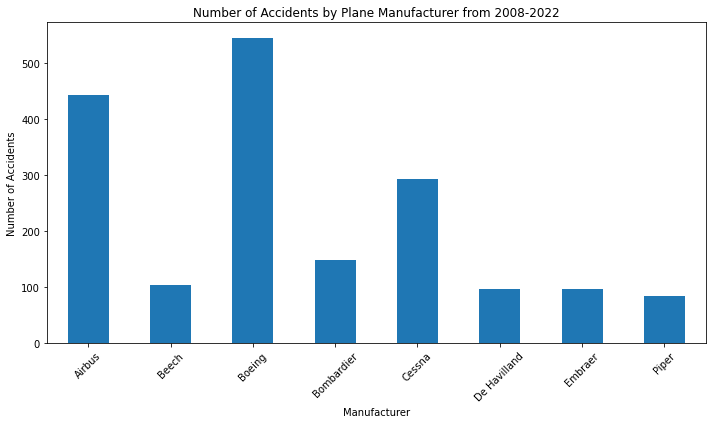

In [22]:
import matplotlib.pyplot as plt

# Group the DataFrame by the 'Manufacturer_Updated' column and count occurrences
manufacturer_counts = acc_manufacturer_df.groupby('Manufacturer_Updated').size()

# Filter for counts > 50 to reduce clumping
manufacturer_counts_filtered = manufacturer_counts[manufacturer_counts > 50]

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
manufacturer_counts_filtered.plot(kind='bar')
plt.title('Number of Accidents by Plane Manufacturer from 2008-2022')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


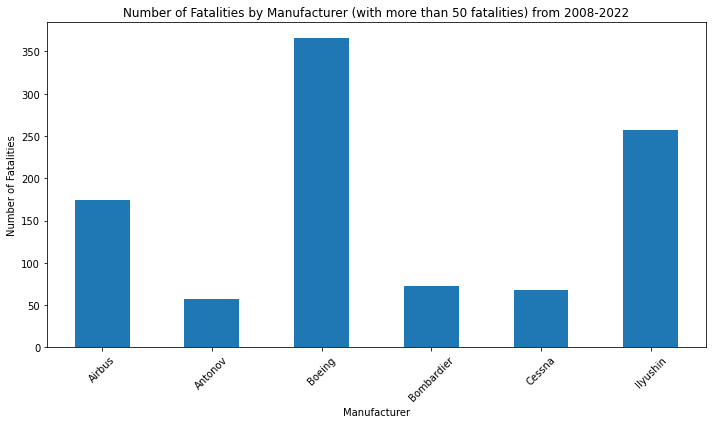

In [83]:
# Group the DataFrame by the 'Manufacturer_Updated' column and sum up the fatalities
fatalities_by_manufacturer = acc_manufacturer_df.groupby('Manufacturer_Updated')['Fatalities'].sum()

# Filter manufacturers with more than 50 fatalities
fatalities_by_manufacturer_filtered = fatalities_by_manufacturer[fatalities_by_manufacturer > 50]

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
fatalities_by_manufacturer_filtered.plot(kind='bar')

# Add title and x labels
plt.title('Number of Fatalities by Manufacturer (with more than 50 fatalities) from 2008-2022')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Fatalities')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


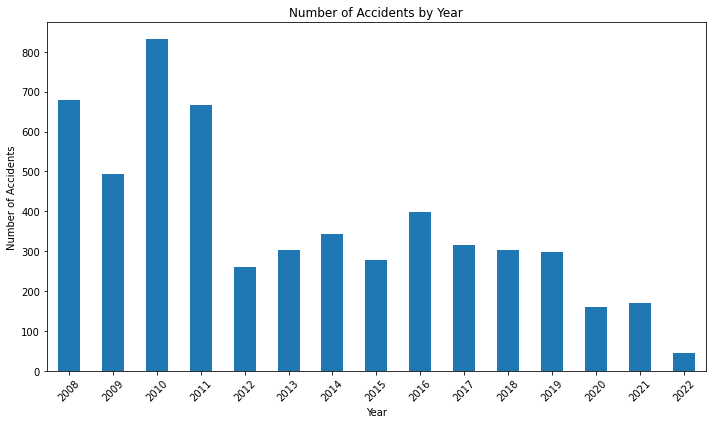

In [24]:
accidents_by_year = acc_manufacturer_df.groupby('Year').size()

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
accidents_by_year.plot(kind='bar')

# Add title and axis labels
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Accident frequency has been relatively low in recent years. This may suggest media coverage has led us to believe airplane accidents are on the rise.

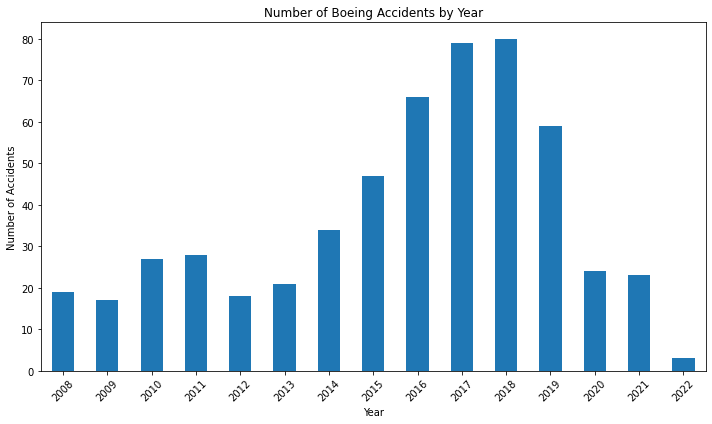

In [80]:
boeing_accidents_df = acc_manufacturer_df[acc_manufacturer_df['Manufacturer_Updated'] == 'Boeing']

# Group the DataFrame by the 'Year' column and count occurrences
boeing_accidents_by_year = boeing_accidents_df.groupby('Year').size()

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
boeing_accidents_by_year.plot(kind='bar')

# Add title and axis labels
plt.title('Number of Boeing Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Although our study aimed to address media coverage of Boeing accidents in 2023 and 2024, we worked with the most updated, publically available ICAO data and it seems Boeing accidents have been lowest over the last few years. We will revist our analysis in the coming years as the ICAO updates their public databases.

The following two cells can be used to analyze the "OccCats" column, we will just look at the "Risk" column. In ICAO terminology, "Risk" typically refers to the level of potential danger or harm associated with a particular event or circumstance in aviation. It often involves the assessment of various factors such as probability, severity, and exposure to determine the overall risk level. In the context of aviation safety data, "Risk" may indicate the likelihood and potential consequences of an incident or accident occurring. "OccCats" stands for "Occurrence Categories." This refers to a classification system used to categorize aviation safety occurrences or events based on certain characteristics or criteria. These categories help in organizing and analyzing safety data to identify trends, patterns, and areas of concern within the aviation industry. 

In summary, while "Risk" focuses on assessing the level of danger associated with an event, "OccCats" involves categorizing different types of occurrences or events in aviation safety data for analysis and reporting purposes. To my understanding, "OccCats" may list engine failure AND loss of control if both happened, but "Risk" refers to what ultimately caused the accident which would be loss of control.

In [25]:
# acc_manufacturer_df['OccCats'] = acc_manufacturer_df['OccCats'].apply(lambda x: ast.literal_eval(x))

In [26]:
# occ_cats = set()

# for lst in combined_accident_df['OccCats']:
#     if len(lst) == 0:
#         pass
#     else:
#         occ_cats.update(lst)

# print(occ_cats)


In [44]:
risk_dict = {
    "ADRM" : "Aerodrome",
    "AMAN" : "Abrubt maneuver",
    "ARC" : "Abnormal runway contact",
    "ATM" : "Air Traffic Management/Communication, Navigation, and Surveillance",
    "BIRD" : "Bird Strike Hazard",
    "CABIN" : "Cabin safety events",
    "CTOL" : "Collision with obstacle(s) during take-off and landing",
    "CFIT" : "Controlled flight into terrain",
    "EVAC" : "Evacuation",
    "FUEL" : "Fuel related",
    "F-NI" : "Fire/smoke (non-impact)",
    "F-POST" : "Fire/smoke (post impact)",
    "GCOL" : "Ground collision",
    "ICE" : "Icing",
    "LALT" : "Low altitude operations",
    "LOC-G" : "Loss of control - ground",
    "LOC-I" : "Loss of control - in-flight",
    "MAC" : "Mid-air collision",
    "MED" : "Maintenance Error Decision Aid",
    "NAV" : "Navigational Error Decision Aid",
    "OTH" : "Other",
    "OTHR" : "Other",
    "RAMP" : "Risk Assessment and Mitigation Process",
    "RE" : "Runway excursion",
    "RI" : "Runway incursion",
    "RS" : "Runway safety",
    "SCF" : "System/component failure or malfunction",
    "SCF-NP" : "System/component failure or malfunction (non-powerplant)",
    "SCF-PP" : "System/component failure or malfunction (powerplant)",
    "SEC" : "Security related",
    "TURB" : "Turbulence encounter",
    "UIMC" : "Unintended flight in Instrument Meteorological Conditions (IMC)",
    "UNK" : "Unknown or Undetermined",
    "USOS" : "Undershoot/overshoot",
    "WILD" : "Wildlife strike",
    "WSTRW" : "Wind shear or thunderstorm"
}

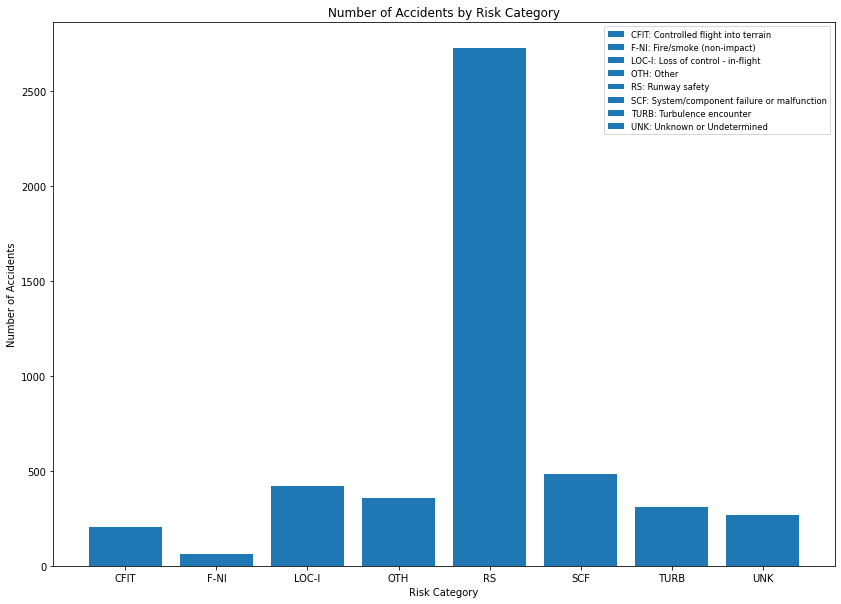

In [81]:
# Group the DataFrame by the 'Risk' column
risk_counts = acc_manufacturer_df.groupby('Risk').size()

plt.figure(figsize=(14, 10))  # Adjust width and height as needed

# label='' tells Matplotlib not to create a default legend entry for the plotted data
bars = plt.bar(risk_counts.index, risk_counts.values, label='')

def get_risk_val(risk_key):
    return risk_dict[risk_key]

# Add title and axis labels
plt.title('Number of Accidents by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Number of Accidents')

# Adding legend with corresponding meanings of acronyms
legend_labels = [f'{key}: {get_risk_val(key)}' for key in risk_counts.index]
plt.legend(bars, legend_labels, loc='upper right', fontsize='small')

# Show plot
plt.show()



The vast majority of airplane accidents appear to be caused by runway safety risks.

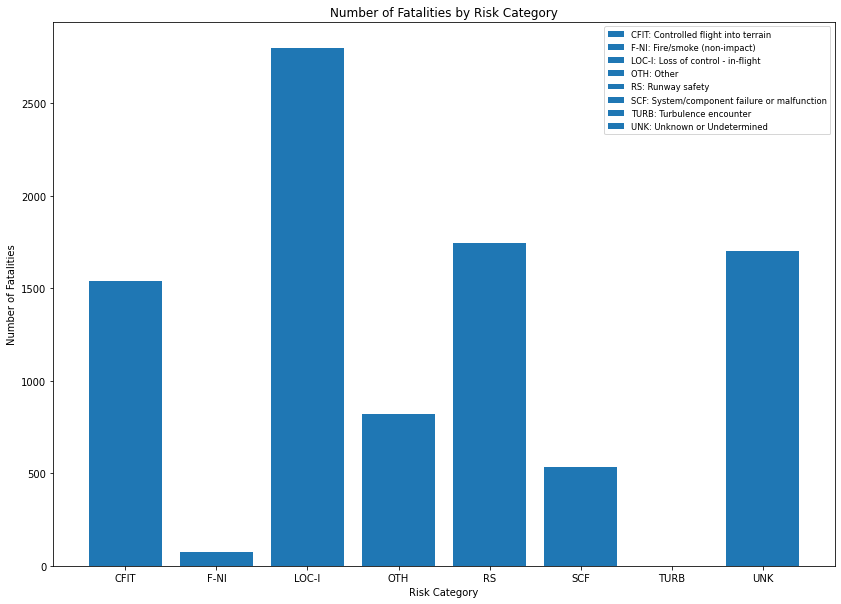

In [82]:
# Group the DataFrame by the 'Risk' column
risk_counts_fatalities = acc_manufacturer_df.groupby('Risk')['Fatalities'].sum()

plt.figure(figsize=(14, 10))  # Adjust width and height as needed

# label='' tells Matplotlib not to create a default legend entry for the plotted data
bars = plt.bar(risk_counts_fatalities.index, risk_counts_fatalities.values, label='')

def get_risk_val(risk_key):
    return risk_dict[risk_key]

# Add title and axis labels
plt.title('Number of Fatalities by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Number of Fatalities')

# Adding legend with corresponding meanings of acronyms
legend_labels = [f'{key}: {get_risk_val(key)}' for key in risk_counts_fatalities.index]
plt.legend(bars, legend_labels, loc='upper right', fontsize='small')

# Show plot
plt.show()

The majority of fatalities were categorized as LOC-I (loss of control - in-flight). Followed by what appears to be a tie in number of fatalities categorized by CFIT (controlled flight into terrain), RS (runway safety) and UNK (unknown).

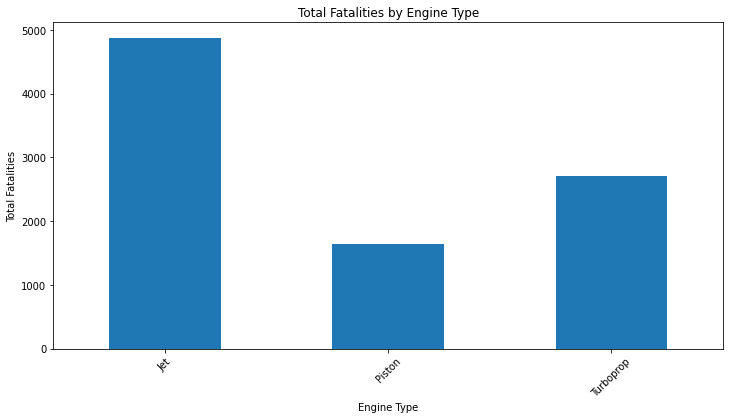

In [68]:
fatalities_by_engine_type = acc_manufacturer_df.groupby('EngineType')['Fatalities'].sum()

plt.figure(figsize=(12, 6))
fatalities_by_engine_type.plot(kind='bar')

# Add title and axis labels
plt.title('Total Fatalities by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Total Fatalities')

plt.xticks(rotation=45)
plt.show();



Majority of total fatalities fall under the jet-engine category.

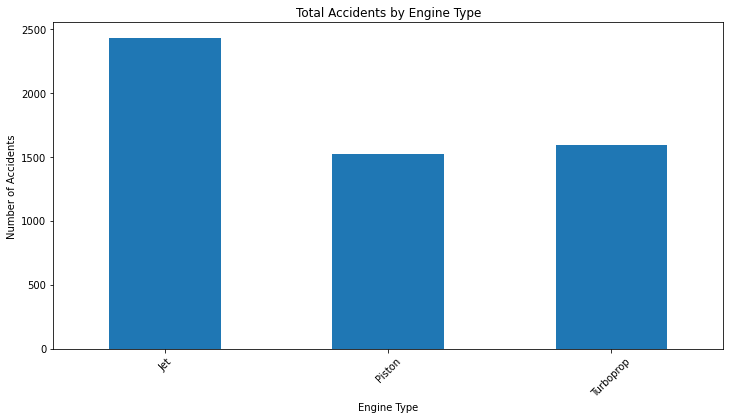

In [77]:
accidents_by_engine_type = acc_manufacturer_df.groupby('EngineType').size()

plt.figure(figsize=(12, 6))
accidents_by_engine_type.plot(kind='bar')

# Add title and axis labels
plt.title('Total Accidents by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45)
plt.show();

Majority of the number of accidents also fall under the jet-engine category.

# Summary

This analysis was motivated by the early 2024 Boeing media craze. The media seemed out to get Boeing, with news stories all around the world covering Boeing accidents/incidents for weeks on end. Is Boeing actually significantly more dangerous than other airplane manufacturers? Or is this another media conspiracy, driven by the desire to get views, likes, and clicks? The goal of this analysis was to gain some insight into which plane manufacturer has the most accidents, how accident occurrence has changed over time, what is the most common cause of airplane accidents, etc. The data set was gathered using the ICAO API Data Service and consists of all accidents around the world reported by the ICAO from 2008-2022.

I would like to add in a couple caveats prior to discussing our results. The first being that the reference database we used to retrieve manufacturer names did not use consistent naming conventions. We accounted for this by manually creating a mapping dictionary where we researched and grouped the manufacturers to the best of our abilities. We are not experts in the aviation industry; there have been countless mergers, crossovers, collaborations, etc. between manufacturers which caused some confusion with grouping. For example, Cessna and Beechcraft are owned by Textron so listing the 'correct' manufacturer is based on a variety of factors we were unable to account for. Collaboration with experts in the field could resolve some of these issues and change results in the future.

The second caveat is we are dealing with count data, not proportion data. It should intuitively make sense that the largest plane manufacturers would have more accidents than smaller plane manufacturers based on the fact that they have more planes being flown more often. In the future, having the total number of flights per manufacturer would increase the robustness of this analysis to more accurately paint a picture of airplane accident statistics. 

Now onto our findings. 

Boeing had the largest total number of accidents as well as the most total fatalities from 2008-2022. Airbus was the runner up for largest total number of accidents, while Ilyushin was the runner up for total number of fatalities (Airbus followed Ilyushin for total fatalities). The fact that Boeing and Airbus have high numbers of accidents and fatalities does not necessarily seem out of the ordinary when you account for them being the top two biggest plane manufacturers in the world. However, Ilyushin does not even make the top 10 biggest plane manufacturers, making this potentially anomalous. Further, in recent years, the total number of accidents has been at a low for the 2008-2022 time period across all plane manufacturers but specifically for Boeing as well. As the database is updated, we will be able to see if accidents have spiked comparatively in 2023/2024 (which would support media perception of Boeing). Furthermore, the vast majority of airplane accidents appear to be caused by runway safety risks while the majority of airplane accidents leading to fatalities were caused by loss of control in-flight risk. Finally, the majority of accidents and fatalities were in jet-engine type aircraft.
